## Домашняя работа


## Easy
Открыть набор данных dota_hero_stats.csv из папки data.

Данные взяты отсюда, на этом же сайте можно найти больше разнообразных данных по Dota2.

Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и посчитайте количество героев для каждого значения legs

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
sns.set()

In [38]:
import requests
import json
link = "https://api.opendota.com/api/heroes"
r = requests.get(link)
data = json.loads(r.text)

In [110]:
df = pd.DataFrame(data)
df.head(100)

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler, Carry]",2
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2
...,...,...,...,...,...,...,...
95,97,npc_dota_hero_magnataur,Magnus,str,Melee,"[Initiator, Disabler, Nuker, Escape]",4
96,98,npc_dota_hero_shredder,Timbersaw,str,Melee,"[Nuker, Durable, Escape]",2
97,99,npc_dota_hero_bristleback,Bristleback,str,Melee,"[Carry, Durable, Initiator, Nuker]",2
98,100,npc_dota_hero_tusk,Tusk,str,Melee,"[Initiator, Disabler, Nuker]",2


In [41]:
df.groupby(["legs"]).name.count()

legs
0    14
2    97
4     8
6     3
8     1
Name: name, dtype: int64

## Normal
Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик. Выведите список героев с этим набором характеристик

In [42]:
dff = df.groupby(["attack_type", "primary_attr"]).size().reset_index()
dff[dff[0] == df.groupby(["attack_type", "primary_attr"]).size().max()]

,attack_type,primary_attr,0
4,Ranged,int,40


In [43]:
df.localized_name[(df["attack_type"] == "Ranged") & (df["primary_attr"] == "int")]

2                     Bane
4           Crystal Maiden
12                    Puck
16            Storm Spirit
20              Windranger
21                    Zeus
23                    Lina
24                    Lion
25           Shadow Shaman
28            Witch Doctor
29                    Lich
31                  Enigma
32                  Tinker
34               Necrophos
35                 Warlock
37           Queen of Pain
41           Death Prophet
43                   Pugna
48                  Dazzle
50                 Leshrac
51        Nature's Prophet
56             Enchantress
62                  Jakiro
63                Batrider
64                    Chen
66      Ancient Apparition
72                 Invoker
73                Silencer
74      Outworld Destroyer
77            Shadow Demon
84                  Rubick
85               Disruptor
88     Keeper of the Light
90                  Visage
99           Skywrath Mage
103                Techies
109                 Oracle
1

## Hard
В колонке roles находится список того, к каким ролям приписывают создатели Dota того или иного героя. Так же у каждого героя есть его основная характеристика, которая записана в колонке primary_attr.

1) Для каждой роли требуется построить bar plot на котором будет видно какое колличество раз героев с тем или иным основным атрибутам создатели игры относят к данной роли.

2) Так же требуется сделать обратный график: для каждого основного аттрибута сделайте bar plot на котором будет видно какое колличество раз создатели Dota относили героя с этим атрибутом к конкретной роли.

3) Сделайте выводы по полученым графикам (это могут быть совершенно любые выводы)

P.s Для задания 1 должно получится 12 графиков (для каждой роли)

In [44]:
df.head()

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,"[Carry, Escape, Nuker]",2
1,2,npc_dota_hero_axe,Axe,str,Melee,"[Initiator, Durable, Disabler, Jungler, Carry]",2
2,3,npc_dota_hero_bane,Bane,int,Ranged,"[Support, Disabler, Nuker, Durable]",4
3,4,npc_dota_hero_bloodseeker,Bloodseeker,agi,Melee,"[Carry, Disabler, Jungler, Nuker, Initiator]",2
4,5,npc_dota_hero_crystal_maiden,Crystal Maiden,int,Ranged,"[Support, Disabler, Nuker, Jungler]",2


In [45]:
dff = df.explode("roles").reset_index(drop=True)
dff.head()

,id,name,localized_name,primary_attr,attack_type,roles,legs
0,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,Carry,2
1,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,Escape,2
2,1,npc_dota_hero_antimage,Anti-Mage,agi,Melee,Nuker,2
3,2,npc_dota_hero_axe,Axe,str,Melee,Initiator,2
4,2,npc_dota_hero_axe,Axe,str,Melee,Durable,2


### Пункт первый

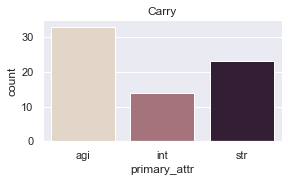

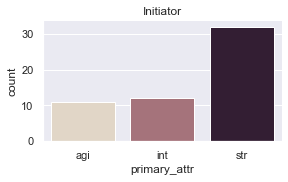

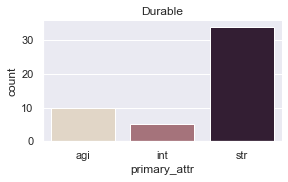

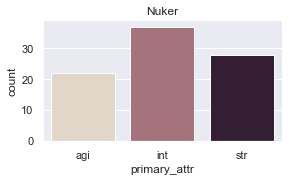

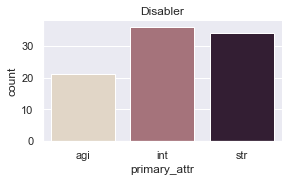

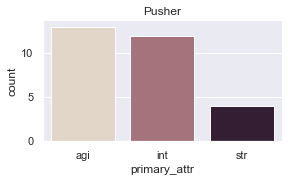

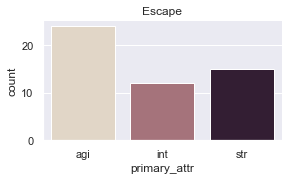

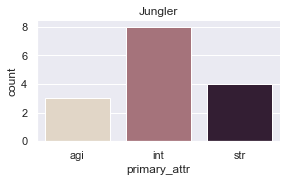

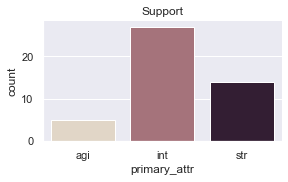

In [116]:
R = list(set(pd.Series.tolist(dff.roles)))
for i, role in enumerate(R):
    datas = dff[dff.roles == role].sort_values("primary_attr")
    sns.catplot(x="primary_attr", kind="count", palette="ch:.25", data = datas).fig.set_size_inches(4,2)
    plt.title(role)
    
    

### Пункт второй

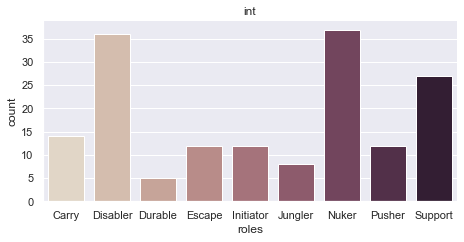

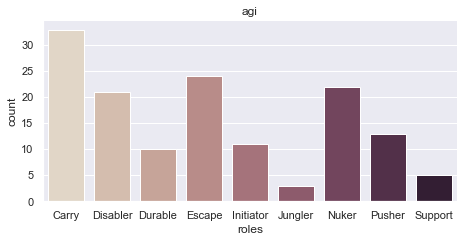

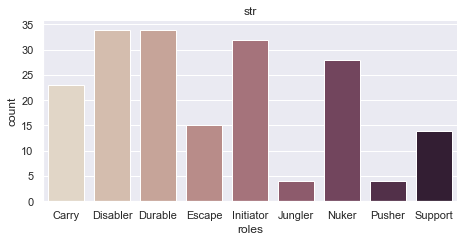

In [109]:
ATR = list(set(pd.Series.tolist(dff.primary_attr)))
for i, atrib in enumerate(ATR):
    datas = dff[dff.primary_attr == atrib].sort_values("roles")
    sns.catplot(x="roles", kind="count", palette="ch:.25", data = datas).fig.set_size_inches(7,3)
    plt.title(atrib)

### Пункт третий

####  1. У героев со свойством интеллект (Int) чаще всего встречаются роли Disabler (Контроль) и Nuker (Быстрый урон), а реже всего Durable (Стойкость).
####  2. У героев со свойством сила (Str) чаще всего встречаются роли Disabler (Контроль) и Durable (Стойкость), а реже всего Jungler (Лес).
####  3. Самая редкая роль в игре Jungler (Лес).